## Import Module

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Process Categorical Features

In [121]:
data = pd.read_csv('../data/AllMoviesDetailsCleaned.csv')

/tmp/ipykernel_3492/928083239.py:1: DtypeWarning: Columns (27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/AllMoviesDetailsCleaned.csv')


In [122]:
df_movie = data.copy()
df_movie.head()

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,...,production_companies_number,production_countries_number,spoken_languages_number,budget_new,revenue_new,popularity_new,vote_average_new,vote_count_new,belongs_to_collection_x,belongs_to_collection
0,2,0,Drama|Crime,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,NaN,Villealfa Filmproduction Oy,Finland,...,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,0,Drama|Comedy,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",NaN,Villealfa Filmproduction Oy,Finland,...,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,4000000,Crime|Comedy,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,NaN,Miramax Films,United States of America,...,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,0,Action|Thriller|Crime,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",NaN,Universal Pictures,Japan,...,3,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,42000,Documentary,tt0825671,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,NaN,inLoops,Austria,...,1,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy= 'constant')

df_movie[['belongs_to_collection']] = pd.DataFrame(imputer.fit_transform(df_movie[['belongs_to_collection']]), columns = ['belongs_to_collection'])

In [124]:
df_movie['belongs_to_collection'].isna().value_counts()

False    329074
Name: belongs_to_collection, dtype: int64

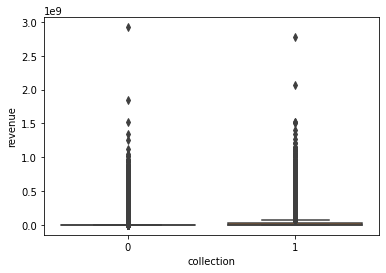

In [125]:
# add column with 1 if movie belongs to any collection and 0 if it does not belong to any collection
df_movie['collection'] = df_movie['belongs_to_collection'].apply(lambda x: 1 if x != 'missing_value' else 0)

sns.boxplot(x = 'collection', y = 'revenue', data = df_movie);

In [39]:
df_movie['collection'].value_counts()

0    324600
1      4474
Name: collection, dtype: int64

In [42]:
print(df_movie.groupby('collection')['revenue'].mean().apply(lambda x: format(x, ',.2f')))

collection
0     1,477,982.62
1    57,284,784.61
Name: revenue, dtype: object


**Analysis:** The revenue is generally higher for movies that are part of a collection. We can use this binary collection variable for our model. ✌

In [45]:
df_movie.columns

Index(['id', 'budget', 'genres', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'production_companies_number',
       'production_countries_number', 'spoken_languages_number', 'budget_new',
       'revenue_new', 'popularity_new', 'vote_average_new', 'vote_count_new',
       'belongs_to_collection_x', 'belongs_to_collection', 'collection',
       'number_production_companies'],
      dtype='object')

In [46]:
# Add column for existence of tag line
df_movie['tagline_exists'] = df_movie['tagline'].apply(lambda x: 1 if x != 0 else 0)

In [47]:
# Add column for length of tag line
df_movie['tagline'].fillna(0, inplace=True)
df_movie['tagline_length'] = df_movie['tagline'].apply(lambda x: len(x) if x != 0 else 0)

In [48]:
# Add column for length of title
df['title'].fillna(0, inplace=True)
df['title_length'] = df['title'].apply(lambda x: len(x) if x != 0 else 0)

In [77]:
df_cast = pd.read_csv('../data/AllMoviesCastingRaw.csv', delimiter=';')
df_cast.head()

,id,actor1_name,actor1_gender,actor2_name,actor2_gender,actor3_name,actor3_gender,actor4_name,actor4_gender,actor5_name,actor5_gender,actor_number,director_name,director_gender,director_number,producer_name,producer_number,screeplay_name,editor_name
0,2,Turo Pajala,0,Susanna Haavisto,0.0,Matti Pellonpää,2,Eetu Hilkamo,0,none,0,4,Aki Kaurismäki,0.0,1,none,0,Aki Kaurismäki,Raija Talvio
1,3,Matti Pellonpää,2,Kati Outinen,1.0,Sakari Kuosmanen,2,Esko Nikkari,2,Kylli Köngäs,0,7,Aki Kaurismäki,0.0,1,Mika Kaurismäki,1,Aki Kaurismäki,Raija Talvio
2,5,Tim Roth,2,Antonio Banderas,2.0,Jennifer Beals,1,Madonna,1,Marisa Tomei,1,24,Allison Anders,1.0,4,Lawrence Bender,1,none,Margaret Goodspeed
3,6,Emilio Estevez,2,Cuba Gooding Jr.,2.0,Denis Leary,2,Jeremy Piven,2,Peter Greene,2,15,Stephen Hopkins,2.0,1,Gene Levy,1,Lewis Colick,Tim Wellburn
4,8,none,0,none,0.0,none,0,none,0,none,0,0,Timo Novotny,0.0,1,Timo Novotny,2,Michael Glawogger,Timo Novotny


In [79]:
df_cast['count_actors'] = 'not counted'
df_cast.head()

,id,actor1_name,actor1_gender,actor2_name,actor2_gender,actor3_name,actor3_gender,actor4_name,actor4_gender,actor5_name,actor5_gender,actor_number,director_name,director_gender,director_number,producer_name,producer_number,screeplay_name,editor_name,count_actors
0,2,Turo Pajala,0,Susanna Haavisto,0.0,Matti Pellonpää,2,Eetu Hilkamo,0,none,0,4,Aki Kaurismäki,0.0,1,none,0,Aki Kaurismäki,Raija Talvio,not counted
1,3,Matti Pellonpää,2,Kati Outinen,1.0,Sakari Kuosmanen,2,Esko Nikkari,2,Kylli Köngäs,0,7,Aki Kaurismäki,0.0,1,Mika Kaurismäki,1,Aki Kaurismäki,Raija Talvio,not counted
2,5,Tim Roth,2,Antonio Banderas,2.0,Jennifer Beals,1,Madonna,1,Marisa Tomei,1,24,Allison Anders,1.0,4,Lawrence Bender,1,none,Margaret Goodspeed,not counted
3,6,Emilio Estevez,2,Cuba Gooding Jr.,2.0,Denis Leary,2,Jeremy Piven,2,Peter Greene,2,15,Stephen Hopkins,2.0,1,Gene Levy,1,Lewis Colick,Tim Wellburn,not counted
4,8,none,0,none,0.0,none,0,none,0,none,0,0,Timo Novotny,0.0,1,Timo Novotny,2,Michael Glawogger,Timo Novotny,not counted


In [93]:
df_cast['count_actors'] = (df_cast['actor1_name'] != 'none').astype(int) \
    + (df_cast['actor2_name'] != 'none').astype(int) \
    + (df_cast['actor3_name'] != 'none').astype(int) \
    + (df_cast['actor4_name'] != 'none').astype(int) \
    + (df_cast['actor5_name'] != 'none').astype(int)

In [94]:
df_cast

,id,actor1_name,actor1_gender,actor2_name,actor2_gender,actor3_name,actor3_gender,actor4_name,actor4_gender,actor5_name,actor5_gender,actor_number,director_name,director_gender,director_number,producer_name,producer_number,screeplay_name,editor_name,count_actors
0,2,Turo Pajala,0,Susanna Haavisto,0.0,Matti Pellonpää,2,Eetu Hilkamo,0,none,0,4,Aki Kaurismäki,0.0,1,none,0,Aki Kaurismäki,Raija Talvio,4
1,3,Matti Pellonpää,2,Kati Outinen,1.0,Sakari Kuosmanen,2,Esko Nikkari,2,Kylli Köngäs,0,7,Aki Kaurismäki,0.0,1,Mika Kaurismäki,1,Aki Kaurismäki,Raija Talvio,5
2,5,Tim Roth,2,Antonio Banderas,2.0,Jennifer Beals,1,Madonna,1,Marisa Tomei,1,24,Allison Anders,1.0,4,Lawrence Bender,1,none,Margaret Goodspeed,5
3,6,Emilio Estevez,2,Cuba Gooding Jr.,2.0,Denis Leary,2,Jeremy Piven,2,Peter Greene,2,15,Stephen Hopkins,2.0,1,Gene Levy,1,Lewis Colick,Tim Wellburn,5
4,8,none,0,none,0.0,none,0,none,0,none,0,0,Timo Novotny,0.0,1,Timo Novotny,2,Michael Glawogger,Timo Novotny,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329039,469215,none,0,Mark Strong,2.0,Traudl Junge,0,Adolf Hitler,2,Michael A. Musmanno,0,5,Craig Collinson,0.0,1,none,0,none,none,4
329040,469216,none,0,none,0.0,none,0,none,0,none,0,0,none,1.0,0,none,0,none,none,0
329041,469217,none,0,Garrye,0.0,Kenny Gan,0,Amanda Ng,0,Michael Chen,0,4,Adrian Lai,0.0,1,none,0,Adrian Lai,none,4
329042,469218,none,0,Evan Silcox,0.0,Zane Penny,0,Rebecca Barker,0,Richie Goldstein,0,6,Levi A. Taylor,0.0,1,none,0,Levi A. Taylor,none,4


In [108]:
# count the number of possible returns per variable
def total_count(data, header, topk=30):
    '''
    Function to return the topk results and the number of their occurence in the data set
    Args: data = dataframe
          header = string; column header
          topk = int; default is 30; amount of top results to be displayed
    Returns: total =  list of dictionaries
    '''
    
    total = data[header][data[header] != 'none'].value_counts().sort_values(ascending = False)[:topk]
    return list(total.index)

In [109]:
total_count(df_cast, 'actor1_name', 30)


['Mel Blanc',
 'Mammootty',
 'Mohanlal',
 'Vijayakanth',
 'Stan Laurel',
 'Clarence Nash',
 'John Wayne',
 'Harold Lloyd',
 'Jackie Chan',
 'Kamal Haasan',
 'Fernandel',
 'Charlie Chaplin',
 'Andy Lau',
 'Roy Rogers',
 'William Boyd',
 'Rajinikanth',
 'Amitabh Bachchan',
 'Mickey Rooney',
 'Buster Keaton',
 'Jean Gabin',
 'Totò',
 'Gérard Depardieu',
 'Akshay Kumar',
 'Barbara Stanwyck',
 'Franco Franchi',
 'Hulk Hogan',
 'Gene Autry',
 'Alberto Sordi',
 'Salman Khan',
 'Randolph Scott']

In [115]:
def add_top_30(dataset, col, topk):
    '''
    Function to add top 30 results from column headers as separate columns to 
    dataframe
    Args: dataset = dataframe 
          col = string; column name
          topk = list; top k values in column
    Returns: dataset = dataframe
    '''
    counter = 0
    for item in topk:
        header_name = str(item[0])+'_name'
        dataset[header_name] = dataset[col].apply(lambda x: 1 if item[0] in x else 0)

    return dataset

In [117]:
top_30_vars = ['actor1_name', 'director_name', 'producer_name']

for var in top_30_vars:
        top_k_var = total_count(df_cast, var)
        list_top_30.append(top_k_var)
        cleaned_df = add_top_30(df_cast, var, top_k_var)
        
cleaned_df

,id,actor1_name,actor1_gender,actor2_name,actor2_gender,actor3_name,actor3_gender,actor4_name,actor4_gender,actor5_name,...,R_name,W_name,B_name,T_name,G_name,D_name,P_name,I_name,L_name,E_name
0,2,Turo Pajala,0,Susanna Haavisto,0.0,Matti Pellonpää,2,Eetu Hilkamo,0,none,...,0,0,0,0,0,0,0,0,0,0
1,3,Matti Pellonpää,2,Kati Outinen,1.0,Sakari Kuosmanen,2,Esko Nikkari,2,Kylli Köngäs,...,0,0,0,0,0,0,0,0,0,0
2,5,Tim Roth,2,Antonio Banderas,2.0,Jennifer Beals,1,Madonna,1,Marisa Tomei,...,0,0,1,0,0,0,0,0,1,0
3,6,Emilio Estevez,2,Cuba Gooding Jr.,2.0,Denis Leary,2,Jeremy Piven,2,Peter Greene,...,0,0,0,0,0,0,0,0,1,0
4,8,none,0,none,0.0,none,0,none,0,none,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329039,469215,none,0,Mark Strong,2.0,Traudl Junge,0,Adolf Hitler,2,Michael A. Musmanno,...,0,0,0,0,0,0,0,0,0,0
329040,469216,none,0,none,0.0,none,0,none,0,none,...,0,0,0,0,0,0,0,0,0,0
329041,469217,none,0,Garrye,0.0,Kenny Gan,0,Amanda Ng,0,Michael Chen,...,0,0,0,0,0,0,0,0,0,0
329042,469218,none,0,Evan Silcox,0.0,Zane Penny,0,Rebecca Barker,0,Richie Goldstein,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# create a list of top 30 actors

# create a new column if in top 30 list else 0